# CAPSTONE PROJECT MODULE 3
# Customer Churn Prediction
Prediksi churn adalah mengidentifikasi pelanggan yang kemungkinan besar akan menikmati layanan. Hal ini penting bagi sebagian besar perusahaan karena memperoleh pelanggan baru lebih mahal dibandingkan mempertahankan pelanggan lama. Jadi, hasil prediksi Churn membantu perusahaan fokus pada pelanggan yang kemungkinan akan churn dan mengembangkan strategi untuk mempertahankan pelanggan tersebut.

Disini saya menggunakan data "data_ecommerce_customer_churn.csv" yang telah disediakan oleh tim Purwadhika

# Exploratory Data Analysis (EDA)
Di sini saya akan mengeksplorasi dataset, mengeksplorasi setiap fitur pelanggan, melakukan analisis deskriptif, dan memvisualisasikan hubungan antar variabel.

In [ ]:
#install library yang dibutuhkan
!pip install fancyimpute
!pip install scikit-optimize

In [ ]:
#import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from fancyimpute import IterativeImputer
from skopt import BayesSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/data_ecommerce_customer_churn.csv")

In [ ]:
#Preview Data
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [ ]:
#Mengecek shape dari dataset
print(df.shape)

(3941, 11)


In [ ]:
#informasi singkat tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


* Dari sel di atas dapat dilihat bahwa data tersebut berisi record 3941 pelanggan dengan 11 fitur.
* Hal lain yang perlu diperhatikan adalah ada **missing value** di beberapa kolom yang akan ditangani nanti saat membuat model.
* Saya menemukan bahwa kolom dengan tipe data float64, adalah variabel kontinu, dan sisanya diskrit


Saya ingin menambahkan fitur baru yaitu "CustomerID", sebagai berikut:

In [ ]:
csv_file_path = 'data_ecommerce_customer_churn.csv'
data = pd.read_csv(csv_file_path)

# Add the "CustomerID" column with values from 1 to 3941
data['CustomerID'] = range(1, 3942)

modified_csv_file_path = 'data_ecommerce_customer_churn_NEW.csv'
data.to_csv(modified_csv_file_path, index=False)

data.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,CustomerID
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0,1
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0,2
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0,3
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0,4
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0,5


In [ ]:
df = pd.read_csv("/content/data_ecommerce_customer_churn_NEW.csv")

In [ ]:
#informasi singkat tentang dataset yang telah ditambahkan features "CustomerID"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
 11  CustomerID                3941 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 369.6+ KB


In [ ]:
#mencetak ringkasan statistik data termasuk kolom kategorikal
df.describe(include='all')

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,CustomerID
count,3747.000000,3772.000000,3941.000000,3941,3941.000000,3941,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000,3941.000000
unique,NaN,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1458,NaN,2055,NaN,NaN,NaN,NaN,NaN,NaN
mean,10.081398,15.650583,3.679269,NaN,3.088302,NaN,4.237757,0.282416,4.531652,176.707419,0.171023,1971.000000
std,8.498864,8.452301,1.013938,NaN,1.381832,NaN,2.626699,0.450232,3.667648,48.791784,0.376576,1137.813034
min,0.000000,5.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,9.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,2.000000,145.700000,0.000000,986.000000
50%,9.000000,14.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,3.000000,163.340000,0.000000,1971.000000
75%,16.000000,21.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,7.000000,195.250000,0.000000,2956.000000


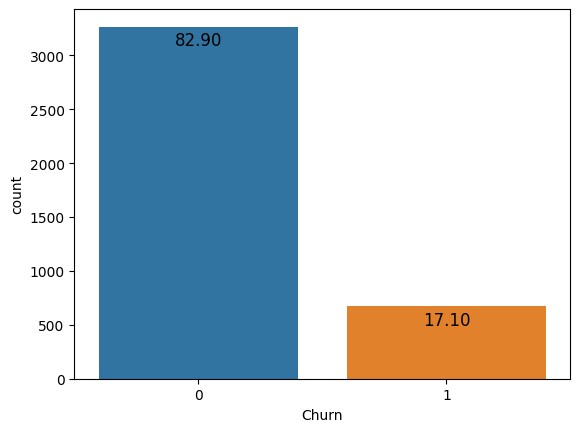

In [ ]:
#menghitung jumlah pelanggan di churn dan bukan kelas churn
ax = sns.countplot(x='Churn', data=df)
for a in ax.patches:
    ax.annotate(format((a.get_height()/3941)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.show()

Pelanggan yang bertahan lebih banyak dibandingkan pelanggan yang berhenti, rasio pelanggan yang dipertahankan dan yang berhenti kira-kira 5 berbanding 1, sehingga tingkat churn sangat rendah, hal ini wajar sehingga membuat data menjadi tidak seimbang.

## Distribusi **Tenure of the customers** di platform

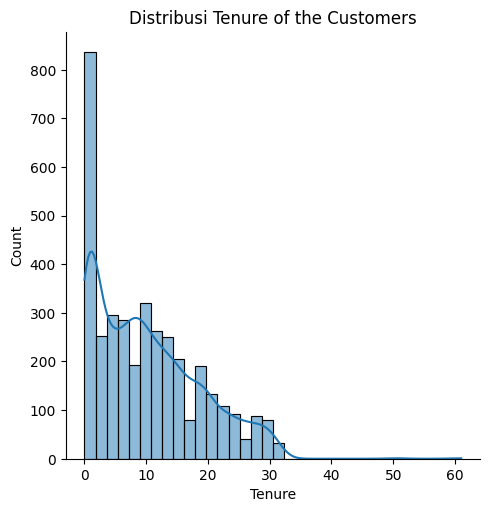

In [ ]:
sns.displot(x='Tenure', kde=True, data=df)
plt.title("Distribusi Tenure of the Customers")
plt.show()

## Distribusi **Recency** pelanggan
**Recency** didapat dari hari sejak pesanan terakhir setiap pelanggan. Pelanggan dengan jumlah hari rendah sejak pemesanan terakhir adalah pelanggan baru dan sebaliknya

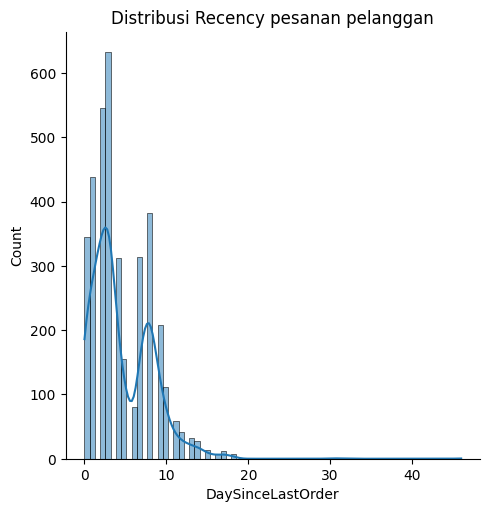

In [ ]:
sns.displot(x='DaySinceLastOrder', kde=True, data=df)
plt.title("Distribusi Recency pesanan pelanggan")
plt.show()

## Distribusi Jumlah yang dikembalikan untuk uang yang dibelanjakan oleh pelanggan
Cashback adalah imbalan yang mengembalikan persentase uang yang dibelanjakan oleh pelanggan kepadanya, Biasanya tergantung pada jumlah yang dibelanjakan, sehingga kolom cashback dapat digunakan sebagai pengganti kolom jumlah yang dibelanjakan.

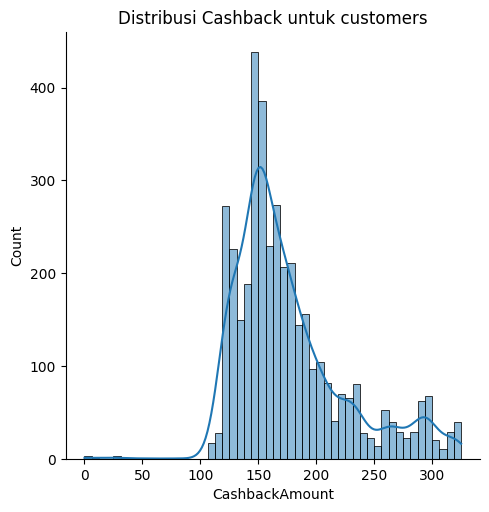

In [ ]:
sns.displot(x='CashbackAmount',kde=True, data=df)
plt.title('Distribusi Cashback untuk customers')
plt.show()

## Distribusi jarak Gudang ke rumah pelanggan

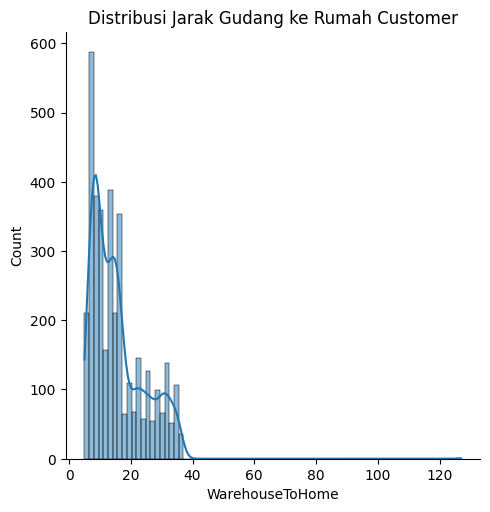

In [ ]:
sns.displot(x='WarehouseToHome', kde=True, data=df)
plt.title("Distribusi Jarak Gudang ke Rumah Customer")
plt.show()

## Distribusi **Satisfaction Score** untuk **Churned** dan **Retained** Customers

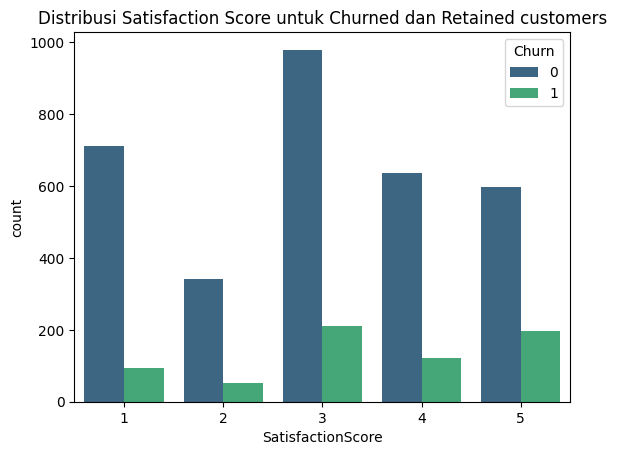

In [ ]:
sns.countplot(x='SatisfactionScore', hue='Churn', palette='viridis', data=df)
plt.title("Distribusi Satisfaction Score untuk Churned dan Retained customers")
plt.show()

## Distribusi **marital status** untuk **Churned** dan **Retained** Customers

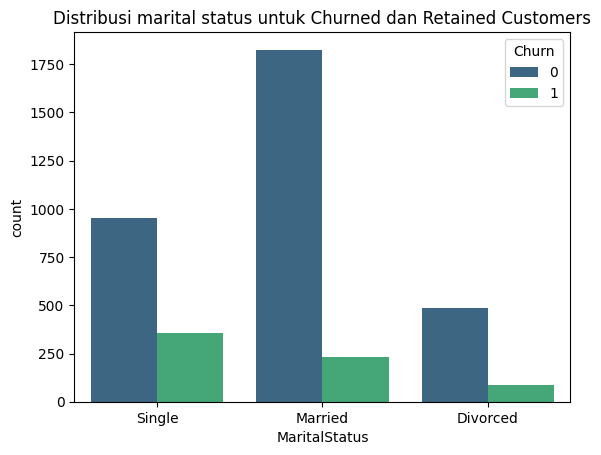

In [ ]:
sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df)
plt.title("Distribusi marital status untuk Churned dan Retained Customers")
plt.show()

## Distribusi **Complain**  untuk **Churned** dan **Retained** Customers

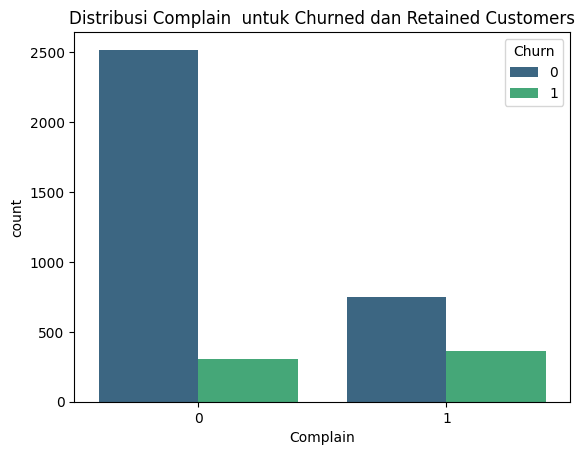

In [ ]:
sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df)
plt.title("Distribusi Complain  untuk Churned dan Retained Customers")
plt.show()

## Hubungan antara **Tenure** dan **Churn Rate**

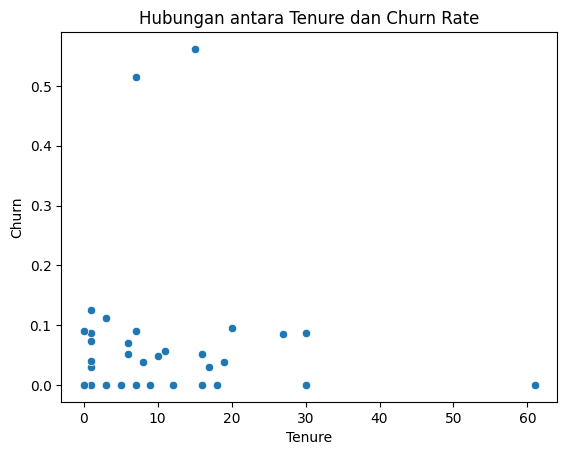

In [ ]:
sns.scatterplot(x=df['Tenure'],y=df.groupby('Tenure').Churn.mean())
plt.title("Hubungan antara Tenure dan Churn Rate")
plt.show()

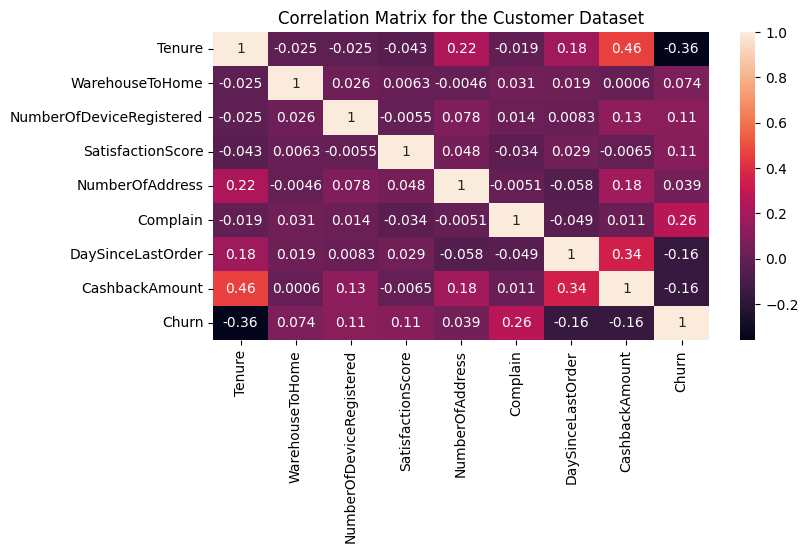

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(data.drop('CustomerID',axis=1).corr(), annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

## **Analisis:**

* **The Tenure**, **Days since last order**, **cashback amount**, dan **warehouse to home** memiliki outlier, namun outlier tersebut tidak berdampak besar pada **model tree**, yang akan menjadi model terakhir saya, jadi saya akan menyimpannya
* Orang yang **Single** memiliki **Churn Rate** yang lebih tinggi dibandingkan dengan **Marital Status** lain nya
* Dari scatterplot terdapat hubungan antara **Tenure** dan **Churn Rate** karena terdapat **churn rate** sebesar 0.5 antara 9 dan 10 **Tenure** dan 0.55 antara 14 dan 15


# Data Preprocessing
Pemrosesan awal melibatkan pengkodean variabel kategori, memasukkan nilai yang hilang, dan penskalaan data.

## Missing Value Treatment
Saya akan menggunakan **missingno package** untuk memvisualisasikan **missing value** dan memahami **missingness type**, yang akan membantu dalam memilih metode untuk menangani **missing value**.

In [ ]:
#Menghitung missing value di setiap kolom
df.isnull().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
CustomerID                    0
dtype: int64

In [ ]:
#Menghitung total missing values dalam dataset
print(f'The number of missing values: {df.isnull().sum().sum()}')
#count the number of rows with missing values
print(f'The number of rows with missing values: {df[df.isnull().any(axis=1)].shape[0]}')

The number of missing values: 576
The number of rows with missing values: 576


Total ada 576 **missing value**, dan juga terdapat 576 baris dengan **missing value**, artinya setiap **missing value** berada pada baris yang berbeda, dan tidak ada baris yang memiliki lebih dari satu **missing value**.

Jadi jika kita menghapus semua baris yang nilainya hilang, kita akan menghapus 576 baris.

In [ ]:
#deskripsi data
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,CustomerID
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023,1971.000000
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576,1137.813034
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000,986.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000,1971.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000,2956.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000,3941.000000


## Plot **missing value** di semua kolom, menggunakan **missingness matrix**

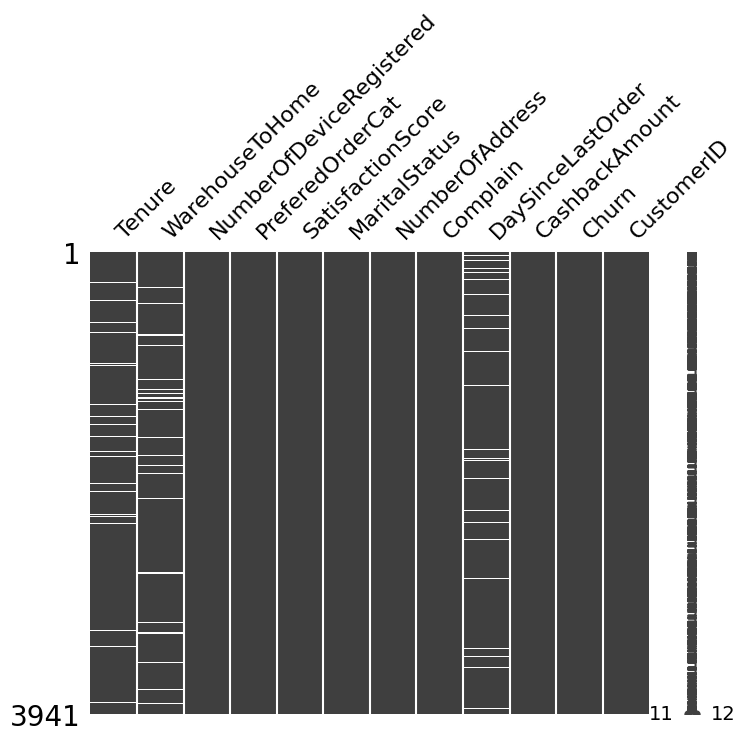

In [ ]:
#plot the missingness matrix
msno.matrix(df, figsize=(8,6))
plt.show()

## Mengidentifikasi hubungan antara **missing value** di kolom

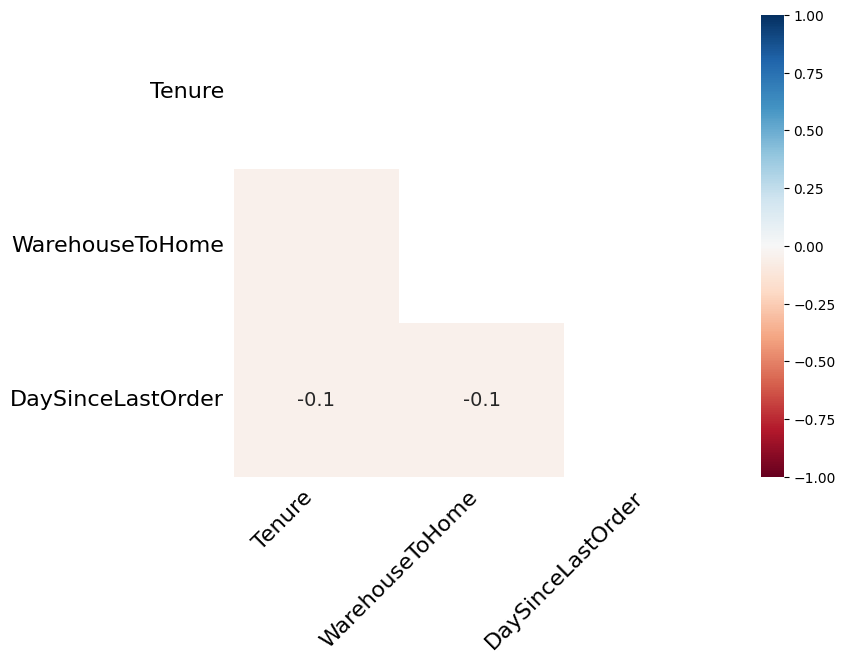

In [ ]:
#plot heatmap of missing values
msno.heatmap(df,figsize=(8,6))
plt.show()

## Categorical Encoding
Di sini saya akan mengkodekan variabel kategori sebagai variabel numerik, karena algoritma **machine learning** bekerja pada angka dan bukan teks. Saya akan menggunakan fungsi pandas **get_dummies** yang menerapkan **one-hot encoding** ke semua variabel yang diteruskan ke sana.

In [ ]:
cat_data = df.select_dtypes(include='object')
cat_data

,PreferedOrderCat,MaritalStatus
0,Laptop & Accessory,Single
1,Mobile,Married
2,Laptop & Accessory,Married
3,Fashion,Divorced
4,Others,Single
...,...,...
3936,Fashion,Married
3937,Mobile Phone,Single
3938,Laptop & Accessory,Married
3939,Mobile,Married


In [ ]:
#encode categorical variables and add it to the normal dataset
encoded = pd.get_dummies(cat_data,drop_first=True)

data_enc = pd.concat([df.drop(cat_data.columns, axis=1), encoded], axis=1)
data_enc.drop('CustomerID', axis=1,inplace=True)

# Model Development
* Pertama membagi data menjadi **training** dan **testing** **samples**
* Membuat **pipelines** yang mencakup semua langkah **preprocessing** dan **classifier**
* Saya akan memakai 4 **classifier**; 2 **linear classifier**, 2 **tree classifier** untuk membangun model
* Saya akan melakukan **cross validation** pada **training samples**, dan menggunakan prediksi dari **testing samples** untuk membandingkan model, dan memilih model terbaik untuk **hyperparameter tuning**.

In [ ]:
#selecting features and target variable, and splitting the data
X=data_enc.drop(['Churn'],axis=1)
y=data_enc['Churn']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

#cross validation
skfcv=StratifiedKFold(n_splits=5)

## Logistic Regression

In [ ]:
#Build logistic regression pipeline
log_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('logreg',LogisticRegression())])

#cross validate logistic regression model
print(f"Cross validation score for Logistic Regression: {np.mean(cross_val_score(log_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Logistic Regression: 0.5724355557707143


Test score for Logistic Regression: 0.5903083700440528
Training score for Logistic Regression: 0.575858250276855


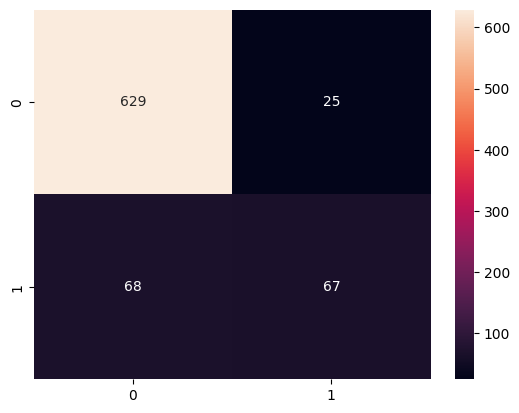

In [ ]:
#use logistic regression pipeline to predict test sample
log_pipe.fit(X_train,y_train)
print(f"Test score for Logistic Regression: {f1_score(y_test, log_pipe.predict(X_test))}")
print(f"Training score for Logistic Regression: {f1_score(y_train, log_pipe.predict(X_train))}")
log_mat = confusion_matrix(y_test, log_pipe.predict(X_test))
sns.heatmap(log_mat, annot=True,fmt="g")
plt.show()

## Linear Discriminant Analysis

In [ ]:
#Build LinearDiscriminantAnalysis pipeline
lda_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('lda',LinearDiscriminantAnalysis())])

#cross validate LinearDiscriminantAnalysis model
print(f"Cross validation score for LinearDiscriminantAnalysis: {np.mean(cross_val_score(lda_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for LinearDiscriminantAnalysis: 0.5636985703461358


Test score for LinearDiscriminantAnalysis: 0.5739910313901345
Training score for LinearDiscriminantAnalysis: 0.5675368898978433


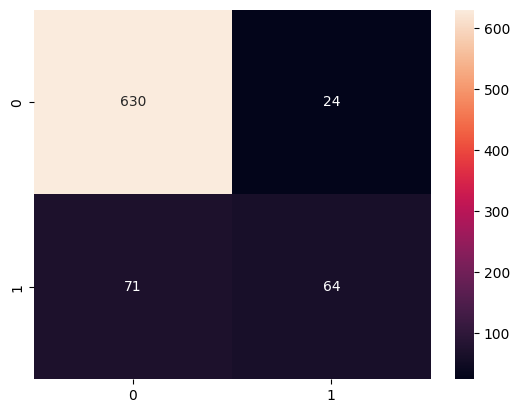

In [ ]:
#use LinearDiscriminantAnalysis pipeline to predict test sample
lda_pipe.fit(X_train,y_train)
print(f"Test score for LinearDiscriminantAnalysis: {f1_score(y_test, lda_pipe.predict(X_test))}")
print(f"Training score for LinearDiscriminantAnalysis: {f1_score(y_train, lda_pipe.predict(X_train))}")
lda_mat = confusion_matrix(y_test, lda_pipe.predict(X_test))
sns.heatmap(lda_mat, annot=True,fmt="g")
plt.show()

## Random Forest

In [ ]:
#Build Random Forest pipeline
rf_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('rfmodel',RandomForestClassifier())])

#cross validate Random Forest model
print(f"Cross validation score for Random Forest: {np.mean(cross_val_score(rf_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Random Forest: 0.7488511649211871


Test score for Random Forest: 0.8273092369477911
Training score for Random Forest: 1.0


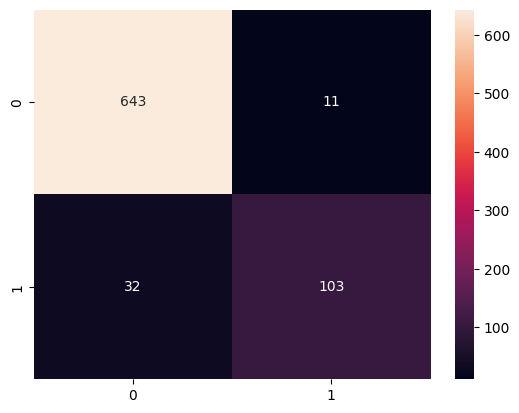

In [ ]:
#use Random Forest pipeline to predict test and train sample
rf_pipe.fit(X_train,y_train)
print(f"Test score for Random Forest: {f1_score(y_test, rf_pipe.predict(X_test))}")
print(f"Training score for Random Forest: {f1_score(y_train, rf_pipe.predict(X_train))}")
rf_mat = confusion_matrix(y_test, rf_pipe.predict(X_test))
sns.heatmap(rf_mat, annot=True,fmt="g")
plt.show()

## XGBoost

In [ ]:
#Build XGBoost pipeline
xgb_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('xgb',XGBClassifier(verbosity=0,use_label_encoder=False))])

#cross validate XGBoost model
print(f"Cross validation score for XGBoost: {np.mean(cross_val_score(xgb_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for XGBoost: 0.7993215771898472


Test score for XGBoost: 0.8449612403100776
Training score for XGBoost: 0.999071494893222


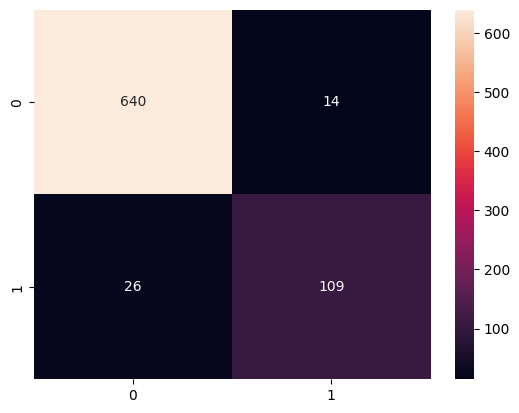

In [ ]:
#use XGBoost pipeline to predict test and train sample
xgb_pipe.fit(X_train,y_train)
print(f"Test score for XGBoost: {f1_score(y_test, xgb_pipe.predict(X_test))}")
print(f"Training score for XGBoost: {f1_score(y_train, xgb_pipe.predict(X_train))}")
xgb_mat = confusion_matrix(y_test, xgb_pipe.predict(X_test))
sns.heatmap(xgb_mat, annot=True, fmt="g")
plt.show()

## Hyperparameter Tuning

In [ ]:
#membuat hyperparameter search space
space={'xgb__eta': (0.01,0.3),
       'xgb__max_depth': (5,11),
      'xgb__subsample': (0.4,1),
      'xgb__n_estimators': (100,250),
      'xgb__gamma':(0,5),
      'xgb__colsample_bytree':(0.4,1),
      'xgb__min_child_weight': (0.3,1)}

In [ ]:
#membuat BayesSearchCV object
search=BayesSearchCV(xgb_pipe,search_spaces=space,n_jobs=-1,cv=skfcv, scoring='f1')

In [ ]:
#fit the object to the data
search.fit(X_train, y_train)

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
              estimator=Pipeline(steps=[('imputer',
                                         IterativeImputer(random_state=0)),
                                        ('scaler', StandardScaler()),
                                        ('xgb',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       early_stopping_rounds=None,
                                                       enable_categori...
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       n_estimators=100,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       predictor=None,
                                                       random_state=None, ...))]),
              n_jobs=-1, scoring='f1',
              search_spaces={'xgb__colsample_bytree': (0.4, 1),
                             'xgb__eta': (0.01, 0.3), 'xgb__gamma': (0, 5),
                             'xgb__max_depth': (5, 11),
                             'xgb__min_child_weight': (0.3, 1),
                             'xgb__n_estimators': (100, 250),
                             'xgb__subsample': (0.4, 1)})

In [ ]:
#print the best cv score and the best parameters
print(search.best_score_)
print(search.best_params_)

0.806570712600412
OrderedDict([('xgb__colsample_bytree', 1.0), ('xgb__eta', 0.18136106071478775), ('xgb__gamma', 0), ('xgb__max_depth', 11), ('xgb__min_child_weight', 1.0), ('xgb__n_estimators', 175), ('xgb__subsample', 1.0)])


0.8470588235294118


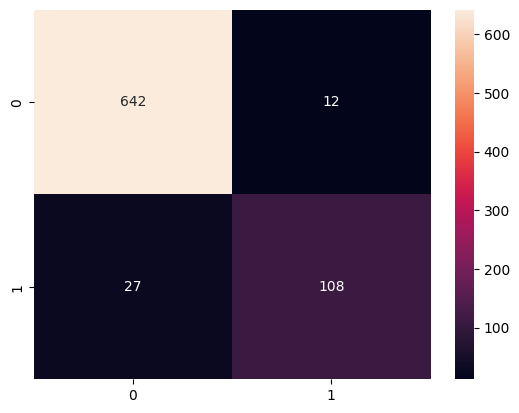

In [ ]:
#use the best model parameters to predict the test sample and print the results
best_model=search.best_estimator_
print(f1_score(y_test,best_model.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, best_model.predict(X_test)), annot=True, fmt="g")
plt.show()

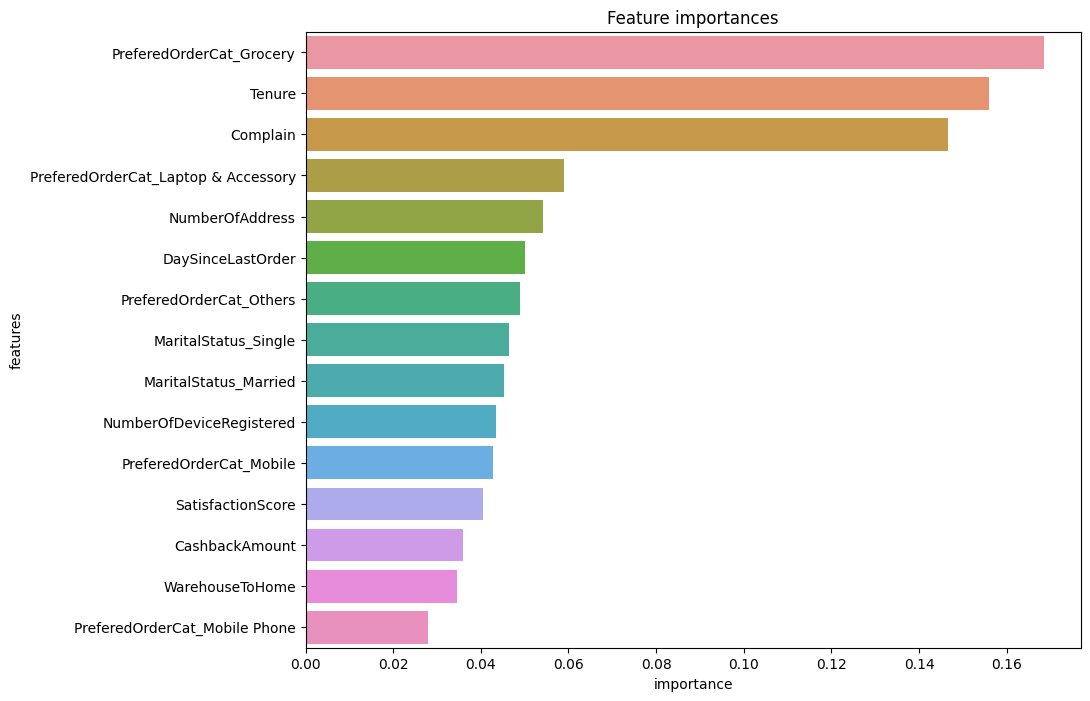

In [ ]:
feature_importance=pd.DataFrame(search.best_estimator_[2].feature_importances_, columns=['importance'])
feature_importance['features'] = X_train.columns

plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='features', data=feature_importance.sort_values(by='importance', ascending=False))
plt.title('Feature importances')
plt.show()

# KESIMPULAN
Setelah membangun 4 model, **tree classifiers** memiliki kinerja lebih baik daripada **linear classifiers**, dengan XGBoost memiliki kinerja terbaik dengan skor uji f1 sebesar **84.49%**. Saya kemudian melakukan **tuned hyperparameter XGBoost** yang menghasilkan peningkatan skor **cross validation** sebesar **0.7%**, dan peningkatan **test score** sebesar **0.2%**.

Mempunya **True Positive Rate** sebesar **84.7%** yang berarti kita dapat mengidentifikasi dengan benar **84.7%** pelanggan yang akan keluar.

Presisinya juga **84.7%** yang berarti dari prediksi pelanggan yang akan keluar, **84.7%** akan benar-benar keluar.

Dari pentingnya fitur model, tiga fitur teratas yang berdampak pada kemungkinan **churn** pelanggan adalah:
* **Kategori pesanan pelanggan** , dimana pelanggan pada kategori **Grocery** memiliki tingkat churn yang lebih tinggi dibandingkan kategori lainnya
* **Tenure** dari pelanggan
* Terlepas dari apakah pelanggan memiliki **komplain** terhadap layanan tersebut atau tidak, seperti yang diharapkan, pelanggan yang memiliki **komplain** memiliki tingkat **churn** yang lebih tinggi dibandingkan pelanggan yang tidak **komplain**

# REKOMENDASI
* Terjadi churn rate yang tinggi terkait dengan kategori pesanan pelanggan dalam konteks e-commerce, berikut beberapa rekomendasi yang dapat dipertimbangkan:
>1. **Peningkatan Kualitas Produk**: Jika produk dalam kategori tertentu mendapat banyak komplain atau memiliki masalah kualitas, pertimbangkan untuk meningkatkan kualitas produk tersebut. Pelanggan cenderung berhenti berlangganan jika mereka merasa produk yang mereka pesan tidak memenuhi harapan mereka.
>2. **Kolaborasi dengan Supplier**: Jika produk berasal dari pihak ketiga, berkolaborasilah dengan Supplier untuk meningkatkan kualitas dan ketersediaan produk. Produk yang lebih baik dari Supplier dapat membantu meningkatkan kepuasan pelanggan.

* Tingginya **churn rate** pada periode **tenure** dalam konteks e-commerce bisa menjadi masalah serius, karena ini menunjukkan bahwa banyak pelanggan berhenti berlangganan atau menggunakan layanan hanya dalam waktu tertentu. Berikut beberapa rekomendasi untuk mengatasi masalah churn rate yang tinggi pada periode tenure:
>1. **Program Loyalitas dan Insentif**: Pertimbangkan untuk mengembangkan program loyalitas yang memberikan insentif kepada pelanggan yang telah berlangganan selama periode tertentu. Insentif ini dapat berupa diskon, penawaran khusus, atau hadiah lainnya yang mendorong pelanggan untuk tetap berlangganan.
>2. **Peningkatan Pengalaman Pengguna**: Pastikan platform e-commerce mudah digunakan, intuitif, dan memberikan nilai tambah yang jelas kepada pelanggan. Pengalaman pengguna yang positif dapat membantu mempertahankan pelanggan selama periode tenure.

* Terjadi churn rate yang tinggi terkait dengan komplain pelanggan dalam konteks e-commerce, berikut beberapa rekomendasi yang dapat dipertimbangkan:
>1. **Analisis Root Cause**: Lakukan analisis mendalam untuk mengidentifikasi akar penyebab dari komplain yang mengarah pada churn. Apakah ada masalah produk, layanan, pengiriman, atau aspek lainnya yang sering menjadi penyebab komplain? Dengan memahami akar penyebabnya, dapat diambil tindakan yang lebih efektif.
>2. **Analisis Jenis Komplain**: Identifikasi pola umum dalam jenis komplain yang paling sering muncul. Ini dapat membantu untuk fokus pada area-area yang paling membutuhkan perbaikan. Jika ada pola yang sama berulang-ulang, ini bisa menjadi sinyal untuk mengatasi masalah yang mendasarinya.